In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
wine['quality'] = np.where((wine['quality'] == 7) | (wine['quality'] == 8), 'Good', 'Bad')

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [10]:
wine['quality'].value_counts()

Bad     1382
Good     217
Name: quality, dtype: int64

In [11]:
x = wine.drop(['quality'], axis = True)
y = wine['quality']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 10)

In [14]:
x.shape

(1599, 11)

In [15]:
y.shape

(1599,)

In [22]:
model = DecisionTreeClassifier(max_depth = 5)

In [23]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [24]:
model.score(x_train, y_train)

0.936550491510277

In [25]:
model.score(x_test, y_test)

0.8458333333333333

--------

In [26]:
print('train', 'test')
for i in range(1, 10) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(x_train, y_train)
    print(model.score(x_train, y_train), model.score(x_test, y_test))

train test
0.8639562157935887 0.865625
0.8733385457388585 0.909375
0.874120406567631 0.878125
0.9022673964034402 0.93125
0.9233776387802971 0.915625
0.9366692728694292 0.915625
0.9546520719311963 0.909375
0.9663799843627834 0.909375
0.9812353401094606 0.90625


--------

In [28]:
print('train', 'test')
for i in range(1, 10) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)
    model = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    model.fit(x_train, y_train)
    print(model.score(x_train, y_train), model.score(x_test, y_test))

train test
0.8639562157935887 0.865625
0.8639562157935887 0.865625
0.8749022673964034 0.89375
0.890539483971853 0.909375
0.9022673964034402 0.903125
0.9163408913213448 0.9125
0.9335418295543393 0.909375
0.9538702111024238 0.909375
0.9718530101641908 0.91875


--------

## 선생님 풀이

In [ ]:
wine.duplicate()

In [ ]:
wine['quality'].value_counts()[0] / (wine['quality']).value_counts()[0] + (wine['quality']).value_counts()[0]

In [35]:
pred = model.predict(x_test)

In [ ]:
# f1_score(pred, y_test) -> y값이 Good, Bad로 되어있기 때문에 error이 남

In [32]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelBinarizer

In [33]:
binarizer = LabelBinarizer()

In [34]:
binarizer.fit(y_test)

LabelBinarizer()

In [36]:
f1_score(binarizer.transform(pred), binarizer.transform(y_test))

0.6904761904761904

--------

In [38]:
f1_score(pred, y_test, pos_label = 'Good')

0.6904761904761904

In [39]:
f1_score(pred, y_test, pos_label = 'Bad')

0.9532374100719425

In [40]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(pred, y_test, labels = ['Good', 'Bad'])

array([[ 29,  12],
       [ 14, 265]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         Bad       0.96      0.95      0.95       279
        Good       0.67      0.71      0.69        41

    accuracy                           0.92       320
   macro avg       0.82      0.83      0.82       320
weighted avg       0.92      0.92      0.92       320



In [48]:
f1_score(pred, y_test, average = 'macro') # Good와 Bad의 f1-score 평균

0.8218568002740665

In [49]:
(0.95 + 0.69) / 2 # Good와 Bad의 f1-score 평균

0.82

--------

In [51]:
model.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [52]:
model.feature_importances_

array([0.03642442, 0.11950943, 0.0450297 , 0.07783061, 0.07834567,
       0.04392535, 0.05731586, 0.06113934, 0.06899635, 0.09476599,
       0.31671727])

--------

In [54]:
pd.DataFrame(list(zip(model.feature_names_in_, model.feature_importances_)),
            columns = ['Feature', 'Importances']).sort_values('Importances', ascending = False)

,Feature,Importances
10,alcohol,0.316717
1,volatile acidity,0.119509
9,sulphates,0.094766
4,chlorides,0.078346
3,residual sugar,0.077831
8,pH,0.068996
7,density,0.061139
6,total sulfur dioxide,0.057316
2,citric acid,0.045030
5,free sulfur dioxide,0.043925


--------

In [56]:
import matplotlib.pyplot as plt

In [57]:
from sklearn.tree import plot_tree

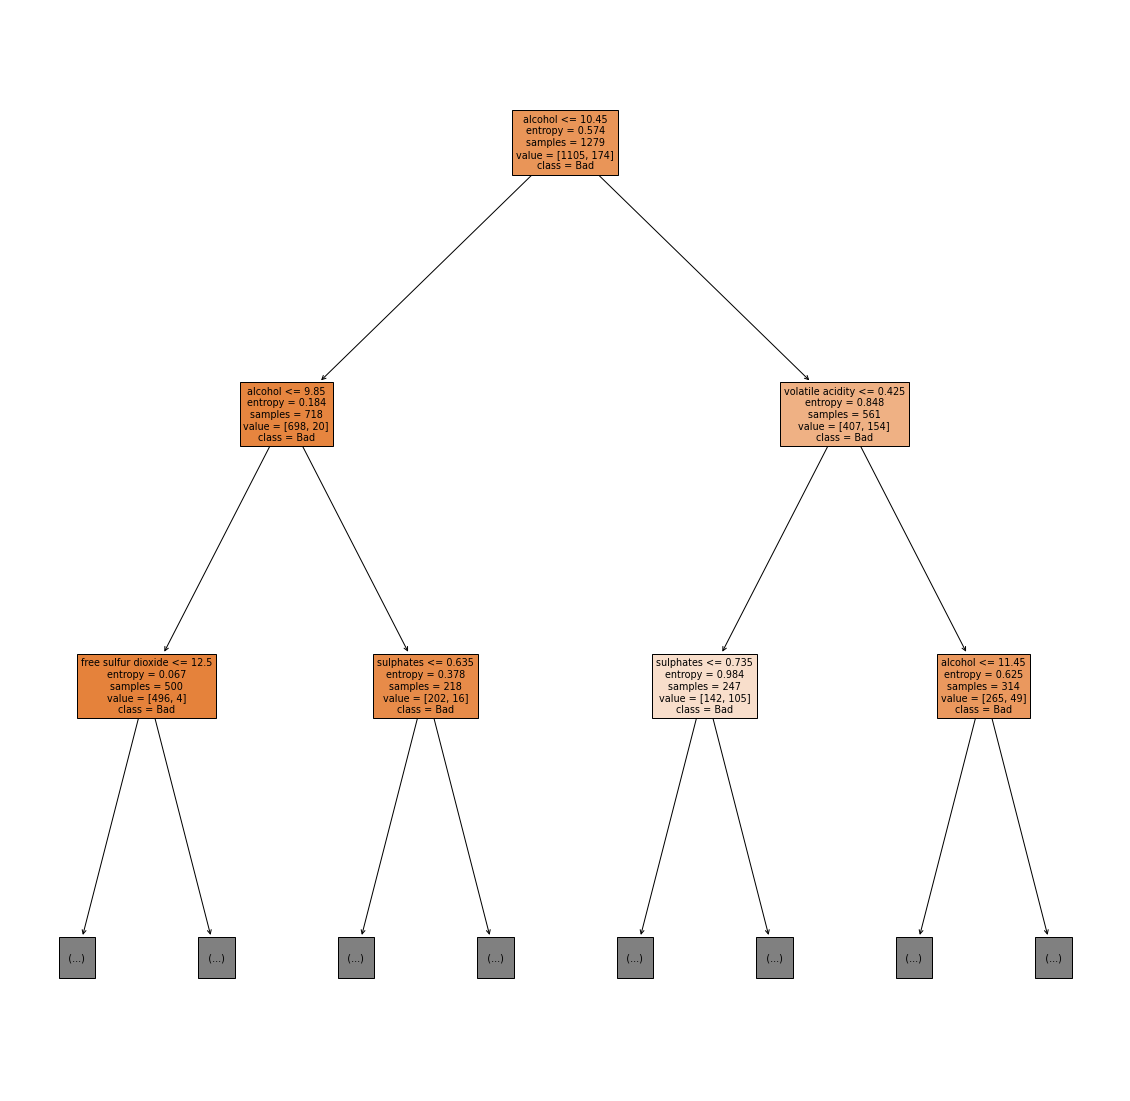

In [58]:
plt.figure(figsize = (20, 20))
plot_tree(model, feature_names = x.columns,
         class_names = ['Bad', 'Good'], filled = True, max_depth = 2)
plt.show()

--------

In [61]:
from sklearn.tree import export_graphviz
import graphviz

In [64]:
dot_data = export_graphviz(model, feature_names = x.columns, class_names = ['Bad', 'Good'], filled = True, rounded = True)

In [65]:
graph = graphviz.Source(dot_data)

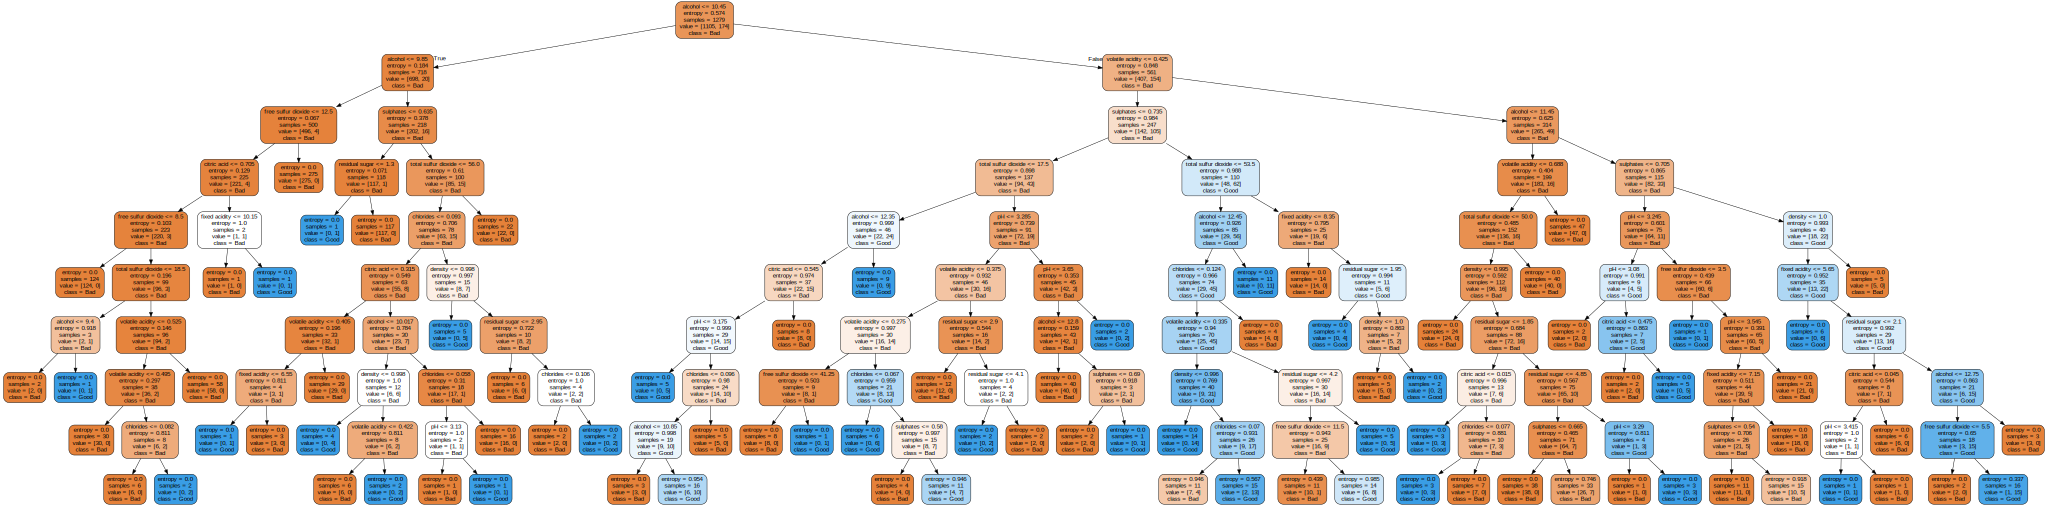

In [66]:
graph